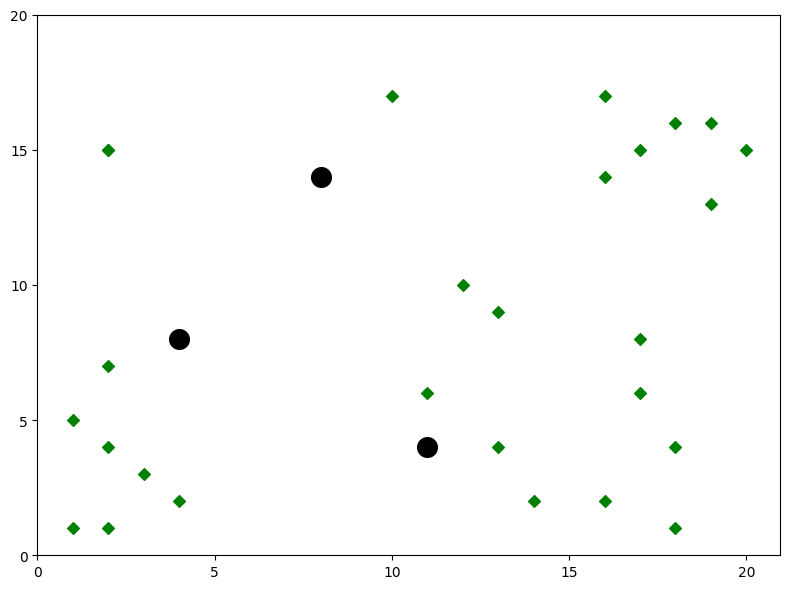

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Datenpunkte (grüne Diamanten)
punkte = np.array([
    [1, 1], [2,1], [4,2], [3,3], [2,4], [1,5], [2,7], [2,15],
    [18,1], [14,2], [16,2], [13,4], [18,4], [17,6], [11,6], [17,8], [13,9], [12,10],
    [19,13], [16,14], [17,15], [20,15], [19,16], [18,16], [16,17], [10,17], [2,15]
])

# Clusterzentren (schwarze Kreise)
cluster_zentren = np.array([
    [4,8],  # k1
    [11,4],  # k2
    [8,14] # k3
])

# Grafik erstellen
plt.figure(figsize=(8, 6))

# Datenpunkte plotten
plt.scatter(punkte[:, 0], punkte[:, 1], color='green', marker='D', label='Datenpunkte')

# Clusterzentren plotten
plt.scatter(cluster_zentren[:, 0], cluster_zentren[:, 1], color='black', s=200, label='Clusterzentren')

# Achsentitel
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.xticks(np.arange(0, 21, 5))
plt.yticks(np.arange(0, 21, 5))

# Grafik anzeigen
plt.tight_layout()
plt.show()


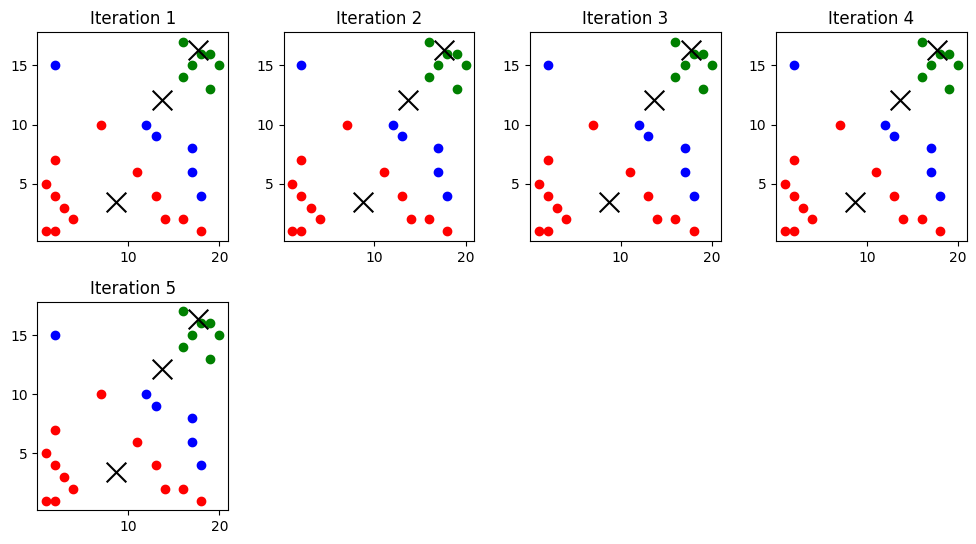

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

punkte = np.array([
    [1, 1], [2,1], [4,2], [3,3], [2,4], [1,5], [2,7], [7,10],
    [18,1], [14,2], [16,2], [13,4], [18,4], [17,6], [11,6], [17,8], [13,9], [12,10],
    [19,13], [16,14], [17,15], [20,15], [19,16], [18,16], [16,17], [2,15]
])

# K-Means Parameter
k = 3
max_iter = 5  # Maximale Iterationen
colors = ['r', 'g', 'b']

# Initialisierung des KMeans-Modells
kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=1, random_state=42)

# Vorbereiten der Visualisierung
plt.figure(figsize=(10, 8))

# Initiale KMeans-Fit, aber keine Iteration


# Visualisierung vor der Iteration
for i in range(max_iter):
    kmeans.fit(punkte)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    plt.subplot(3, 4, i + 1)
    
    # Visualisiere die aktuellen Cluster
    for cluster_idx in range(k):
        cluster_points = punkte[labels == cluster_idx]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
    
    # Visualisiere die Zentroiden
    plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=200, label='Centroid')
    plt.title(f'Iteration {i + 1}')
    plt.tight_layout()

    # KMeans Update (Aktualisiere die Clusterzentren nach der Iteration)
    labels = kmeans.fit_predict(punkte)  # Berechnet Labels und Zentroiden basierend auf aktuellen Clusterzuweisungen
    centers = kmeans.cluster_centers_  # Holen sich die neuen Zentroiden

plt.show()


Davies-Bouldin-Index: 0.34492747229861304


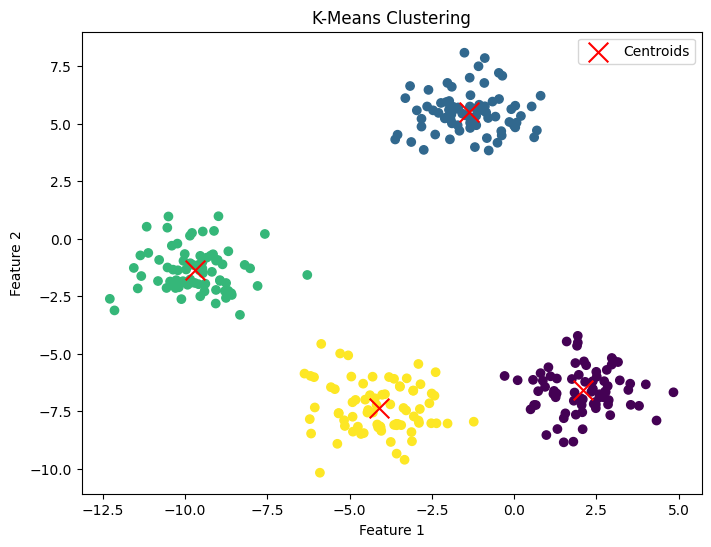

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Beispiel-Daten generieren
X, _ = make_blobs(n_samples=300, centers=4, random_state=111)

# K-Means-Clustering durchführen
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Davies-Bouldin-Index berechnen
db_index = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin-Index: {db_index}')

# Plotten der Daten und Clustern
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Clusterzentren plotten
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.legend()
plt.show()
